# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [4]:
from scipy.stats import uniform
x = uniform.rvs(size=10)
a = 0
b = 3
randoms  = a + (b-a)*x
print(randoms)

[1.23326485 1.09286894 0.93032316 1.41342999 1.18731078 2.53267527
 1.02314033 1.80836467 2.85369895 1.5497448 ]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

In [5]:
# your code here

# function definition
def random_uni_dist(bottom, ceiling, count):
    x = uniform.rvs(size=count)
    a = bottom
    b = ceiling
    randoms = a + (b-a)*x
    return randoms

In [6]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

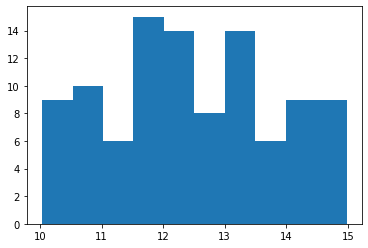

In [9]:
# bottom=10, ceiling=15, count=100

randoms = random_uni_dist(10,15,100)

# Histogram plot
_ = plt.hist(randoms, bins=10)

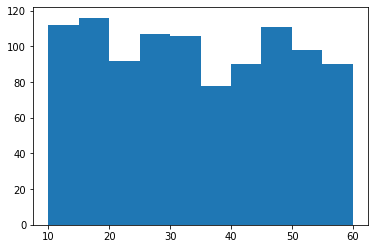

In [10]:
# bottom=10, ceiling=60, count=1,000

randoms = random_uni_dist(10,60,1000)

# Histogram plot
_ = plt.hist(randoms, bins=10)

How are the two distributions different?

In [3]:
# The X axis depends on the ceiling value
# The Y-axis depends on the count value. Higher count, more uniform the distribution is

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

In [11]:
# import libraries
import scipy.stats as stats

In [12]:
# Function definition
def random_norm_dist(mean, deviation, count):
    sample = stats.norm(mean, deviation).rvs(count)
    return sample

<AxesSubplot:>

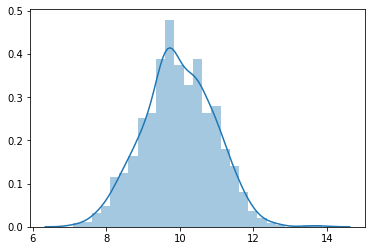

In [13]:
# Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1

sample = random_norm_dist(10, 1, 1000)

# plot the distribution
sns.distplot(sample)

<AxesSubplot:>

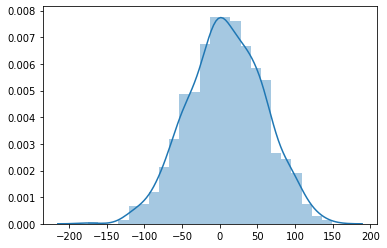

In [14]:
# Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50

sample = random_norm_dist(10, 50, 1000)

# plot the distribution
sns.distplot(sample)

How are the two distributions different?

In [15]:
# They have a different distribution around the mean as the first one has a deviation of 10
# and the second one, of 50

## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [16]:
# your code here

# import libraries

import pandas as pd

# import dataset
df = pd.read_csv('../data/vehicles.csv')

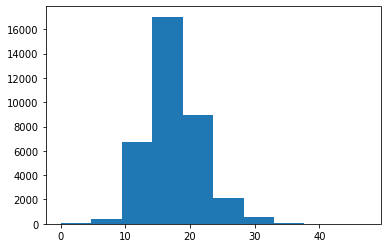

In [19]:
_ = plt.hist(df['Fuel Barrels/Year'])

2. CO2 Emission Grams/Mile 

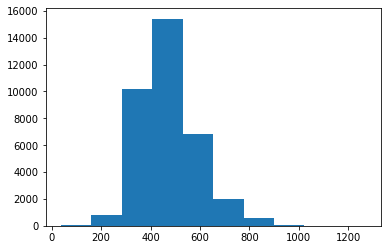

In [20]:
_ = plt.hist(df['CO2 Emission Grams/Mile'])

3. Combined MPG

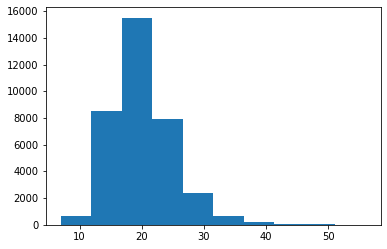

In [21]:
_ = plt.hist(df['Combined MPG'])

Which one(s) of the variables are nearly normally distributed? How do you know?

In [22]:
# barrels & emission relatively normal, MPG left skew

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 1 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

In [23]:
# your code here

# import libraries
import numpy as np
 

In [40]:
# function definition
def random_exp_dist(scale, size):
    sample = np.random.exponential(scale=scale, size= size)
    return sample

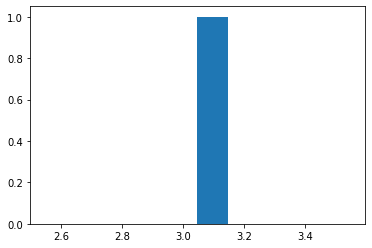

In [42]:
sample = random_exp_dist(10, 1)
_ = plt.hist(sample)

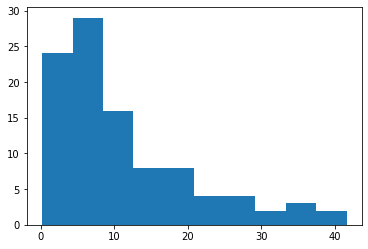

In [43]:
sample = random_exp_dist(10, 100)
_ = plt.hist(sample)

How are the two distributions different?

In [8]:
# no variation can be see when size =1

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [9]:
# Hint: This is same as saying P(x<15)


In [44]:
# import libraries
import scipy.stats as stats

In [45]:
stats.expon(0,10).cdf(15)

# The probability is 77.7%

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [46]:
stats.expon(0,10).sf(15)

# The probability is 22.3%

0.22313016014842982